In [3]:
import os 
import numpy as np 
import scipy.linalg as LA
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
plt.rcParams['text.usetex'] = True

In [63]:
#! cat ../Synthetic/Exp_01_elevation_dependent/SaveData/lk_pre_1002a_mb_0.0_off.dat.names 

In [5]:
2.5 / 0.1

25.0

In [6]:
####################################################################################
# load inital conidtions used in model run 
####################################################################################
#x_c = np.loadtxt('../Synthetic/Exp_01_elevation_dependent/SaveData/lk_pre_500a_mb_2.50_off.dat') # x-coordinate
z_s = np.loadtxt('../Data/SurfTopo.dat')    # surface elevation (m a.s.l.)
z_b = np.loadtxt('../Data/BedTopo.dat')[:,1]     # bed evelation (m a.s.l.)

# # flip all axes so x-coord is descending not ascending
# x_c = x_c[::-1]
# x_c = x_c.reshape(-1,143,12)
z_s = z_s[::-1]
# z_b = z_b[::-1] 

#####################################################################################
# interpolate inital conditions and evaluate a Elmer Grid cell locations
#####################################################################################
f   = interpolate.interp1d(z_s[1], z_s[0])

In [7]:
dats = [fn for fn in os.listdir('../Synthetic/Exp_01_elevation_dependent/SaveData/') if fn.endswith('.dat') and '1002a' in fn]
# Sort the list based on MB offset
#dats.sort(key=lambda i: float(i.split('_')[-3]))
dats.sort(key=lambda i: float('.'.join(i.split('_')[-2].split('.'))))
#dats.sort(key=lambda i: float(i.split('_')[-2]))

MB_PRE = []
for i, dat in enumerate(dats): 
    dat = np.loadtxt('../Synthetic/Exp_01_elevation_dependent/SaveData/{}'.format(dat))
    dat = dat.reshape(-1,143,12)
    #dat[:,:,7][dat[:,:,7] < dat[:,:,8]+10] = dat[:,:,8][dat[:,:,7] < dat[:,:,8]+10]
    
    MB_PRE.append(dat)

    
del_bd = np.linspace(0,2.5,len(MB_PRE))

In [8]:
del_bd

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5])

Set up the color bar!!

In [9]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

############################################################
# For Seting up the colorbar: 
#    - http://csc.ucdavis.edu/~jmahoney/matplotlib-tips.html
############################################################

colormap = cm.plasma
normalize = mcolors.Normalize(vmin=np.min(del_bd), vmax=np.max(del_bd))

# Colorbar setup
s_map = cm.ScalarMappable(norm=normalize, cmap=colormap)
s_map.set_array(del_bd)

# If color parameters is a linspace, we can set boundaries in this way
halfdist = (del_bd[1] - del_bd[0])/2.0
boundaries = np.linspace(del_bd[0] - halfdist, del_bd[-1] + halfdist, len(del_bd) + 1)

# Convergence Figures

In [10]:
PuBu   = plt.cm.viridis(np.linspace(0,1,len(del_bd)))
plasma = plt.cm.plasma(np.linspace(0,1,len(del_bd)))

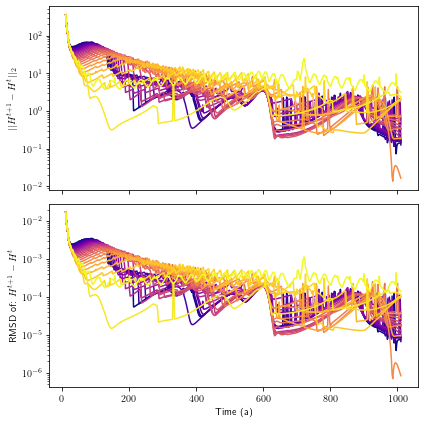

In [99]:
fig, ax = plt.subplots(2,1,sharex=True,figsize=(6.0,6.0))

for i in range(len(MB_PRE)):
    dat = MB_PRE[i]
    ax[0].plot((dat[1:,0,0]+4)*2, 
               LA.norm(dat[1:,:,7] - dat[:-1,:,7],axis=1,ord=2),
               color=plasma[i],
               label='$\Delta \dot b =$ {:1.2f}'.format(del_bd[i]))
    
    ax[0].set_ylabel(r'$||H^{t+1} - H^{t}||_2$')
    ax[0].set_yscale('log')
    #ax[0].grid( which='both')
    
    ax[1].plot((dat[1:,0,0]+4)*2, 
               np.sqrt(((dat[1:,:,7] - dat[:-1,:,7])**2).mean(axis=1)) / np.mean(dat[1:,:,7], axis=1),
               color=plasma[i],
               label='$\Delta \dot b =$ {:1.2f}'.format(del_bd[i]))
    
    ax[1].set_ylabel('RMSD of: $H^{t+1} - H^{t}$')
    ax[1].set_yscale('log')
    ax[1].set_xlabel('Time (a)')

    #ax[1].grid( which='both')

#ax[0].legend(title='(m a$^{-1}$)',fontsize='small');

fig.tight_layout()
#fig.savefig('../plots/LK_PRE_MB_converge_svr.png',dpi=300,bbox_inches='tight',facecolor="w")

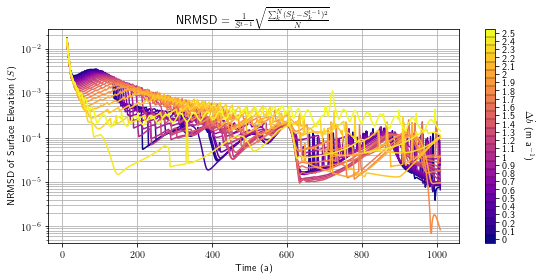

In [151]:
fig, ax = plt.subplots(1,1,sharex=True,figsize=(8.0,4.0))

for i in range(len(MB_PRE)):
    dat = MB_PRE[i]
    
    ax.plot((dat[1:,0,0]+4)*2, 
               np.sqrt(((dat[1:,:,7] - dat[:-1,:,7])**2).mean(axis=1)) / np.mean(dat[1:,:,7], axis=1),
               color=plasma[i],
               label='$\Delta \dot b =$ {:1.2f}'.format(del_bd[i]))
    
    ax.set_ylabel('NRMSD of Surface Elevation ($S$)')
    ax.set_yscale('log')
    ax.grid(True, which='both')
    
    ax.set_title(r'NRMSD = $\frac{1}{\bar S^{t-1} }\sqrt{\frac{\sum_k^N (S_k^t - S_k^{t-1})^2 }{N}}$')
    ax.set_xlabel('Time (a)')
    
#ax[0].legend(title='(m a$^{-1}$)',fontsize='small');
cbar = fig.colorbar(s_map, spacing='proportional', ticks=del_bd, ax=ax, boundaries=boundaries, drawedges=True, format='%2.2g') 
cbar.set_label('$\Delta \dot b$ (m a$^{-1}$)', rotation=270, labelpad=20)

fig.tight_layout()
fig.savefig('../plots/NRMSD_converge.png', dpi = 600, bbox_inches='tight', facecolor='w')

In [150]:
plt.grid?

Signature: plt.grid(b=None, which='major', axis='both', **kwargs)
Docstring:
Configure the grid lines.

Parameters
----------
b : bool or None, optional
    Whether to show the grid lines. If any *kwargs* are supplied,
    it is assumed you want the grid on and *b* will be set to True.

    If *b* is *None* and there are no *kwargs*, this toggles the
    visibility of the lines.

which : {'major', 'minor', 'both'}, optional
    The grid lines to apply the changes on.

axis : {'both', 'x', 'y'}, optional
    The axis to apply the changes on.

**kwargs : `.Line2D` properties
    Define the line properties of the grid, e.g.::

        grid(color='r', linestyle='-', linewidth=2)

    Valid keyword arguments are:

    Properties:
    agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
    alpha: float or None
    animated: bool
    antialiased or aa: bool
    clip_box: `.Bbox`
    clip_on: bool
    clip_path: Patch or (Path, Tran

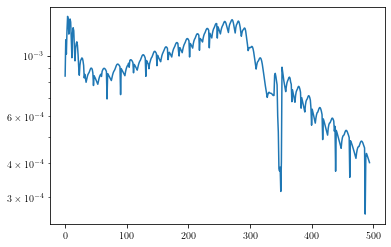

In [84]:
plt.plot((np.mean(H[1:,:] - H[:-1,:], axis=1) / np.mean(H[:-1,:], axis=1))[5:])
plt.yscale('log')

In [14]:
#f(dat[0,:,4])

In [15]:
#dat[0,:,4]

# Length and Area timeseries

In [16]:
plasma = plt.cm.plasma(np.linspace(0,1,len(del_bd)))

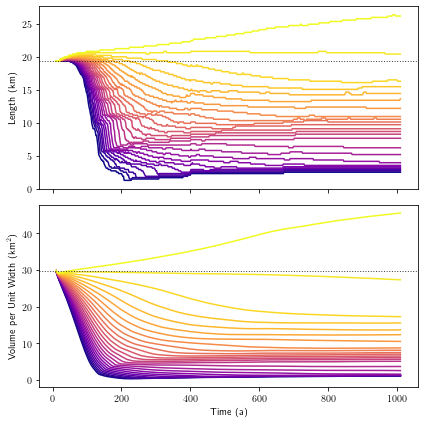

In [17]:
fig, ax = plt.subplots(2,1,sharex=True,figsize=(6.0,6.0))

for i in range(len(MB_PRE)):
    dat = MB_PRE[i]
    L = np.count_nonzero((dat[:,:,7 ] - dat[:,:,8]) > 10.,axis=1)*206/1000.0
    ax[0].plot((dat[:,0,0]+4)*2, L,label='$\Delta \dot b =$ {:1.2f}'.format(del_bd[i]),color=plasma[i])
    ax[0].set_ylabel('Length (km)')

    integrated = np.trapz((dat[:,:,7] - dat[:,:,8])/1000.0, axis = 1)
    ax[1].plot((dat[:,0,0]+4)*2,integrated,label='$\Delta \dot b =$ {:1.2f}'.format(del_bd[i]),color=plasma[i])
    ax[1].set_ylabel('Volume per Unit Width (km$^2$)')
    ax[1].set_xlabel('Time (a)')
    
    
ax[0].axhline( np.count_nonzero((dat[0,:,7 ] - dat[0,:,8]) > 10.)*206/1000.0, linestyle=':',color='k',alpha=0.75,lw=1.0)
ax[1].axhline(np.trapz((dat[0,:,7] - dat[0,:,8])/1000.0), linestyle=':',color='k',alpha=0.75,lw=1.0)

#ax[0].legend(title='(m a$^{-1}$)',fontsize='small');

fig.tight_layout()
#fig.savefig('../plots/LK_PRE_MB_length_svr.png',dpi=300,bbox_inches='tight')

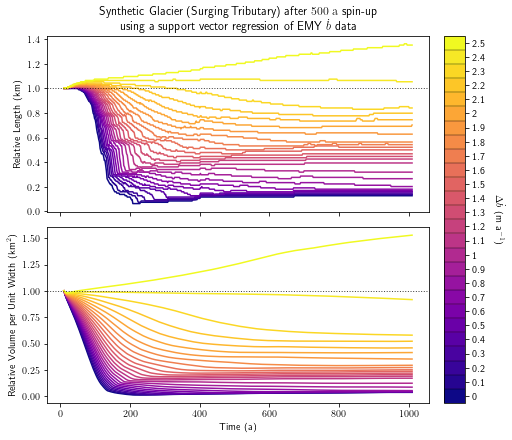

In [26]:
fig, ax = plt.subplots(2,1,sharex=True,constrained_layout=True, figsize=(7.0,6.0))

for i in range(len(MB_PRE)):
    dat = MB_PRE[i]
    L = np.count_nonzero((dat[:,:,7 ] - dat[:,:,8]) > 10., axis=1)/np.count_nonzero((dat[0,:,7 ] - dat[0,:,8]) > 10.)#*206/1000.0
    ax[0].plot((dat[:,0,0]+4)*2, L,label='$\Delta \dot b =$ {:1.2f}'.format(del_bd[i]),color=plasma[i])
    ax[0].set_ylabel('Relative Length (km)')

    integrated = np.trapz((dat[:,:,7] - dat[:,:,8])/np.trapz(dat[0,:,7] - dat[0,:,8]), axis = 1)
    ax[1].plot((dat[:,0,0]+4)*2,integrated,label='$\Delta \dot b =$ {:1.2f}'.format(del_bd[i]),color=plasma[i])
    ax[1].set_ylabel('Relative Volume per Unit Width (km$^2$)')
    ax[1].set_xlabel('Time (a)')
    
    
ax[0].axhline(1.0, linestyle=':',color='k',alpha=0.75,lw=1.0)
ax[1].axhline(1.0, linestyle=':',color='k',alpha=0.75,lw=1.0)

#ax[0].set_title('Synthetic Little Kluane (Surging Tributary)')
ax[0].set_title(r'\begin{center} Synthetic Glacier (Surging Tributary) after $500 \; \rm{a}$ spin-up \\ using a support vector regression of EMY $\dot b$ data \end{center}',
                pad = 20.0)

#ax[0].legend(title='(m a$^{-1}$)',fontsize='small');
cbar = fig.colorbar(s_map, spacing='proportional', ticks=del_bd, ax=ax, boundaries=boundaries, drawedges=True, format='%2.2g') 
cbar.set_label('$\Delta \dot b$ (m a$^{-1}$)', rotation=270, labelpad=20)


#fig.tight_layout()
fig.savefig('../plots/LK_PRE_MB_length_svr_norm.png',dpi=300,bbox_inches='tight',facecolor="w")

In [19]:
RA = np.trapz((np.stack(MB_PRE)[:,-1,:,7] - np.stack(MB_PRE)[:,-1,:,8])/np.trapz(np.stack(MB_PRE)[0,0,:,7] - np.stack(MB_PRE)[0,0,:,8]), axis = 1)

In [31]:
import time
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1),
                   param_grid={"C"    : np.geomspace(1e-3, 1e2, 6),
                               "gamma": np.geomspace(1e-6, 1e0, 7)})


In [32]:
t0 = time.time()
svr.fit(RA.reshape(-1,1), del_bd);
svr_fit = time.time() - t0

print("SVR complexity and bandwidth selected and model fitted in {:.3f} s".format(svr_fit))

SVR complexity and bandwidth selected and model fitted in 0.253 s


In [103]:
import scipy.interpolate as interpolate

cs  = interpolate.CubicSpline(RA, del_bd)
ak  = interpolate.Akima1DInterpolator(RA, del_bd)
Pc  = interpolate.PchipInterpolator(RA, del_bd)
LS1 = interpolate.interp1d(RA, del_bd, kind='slinear')
L1D = interpolate.interp1d(RA, del_bd, kind='linear')


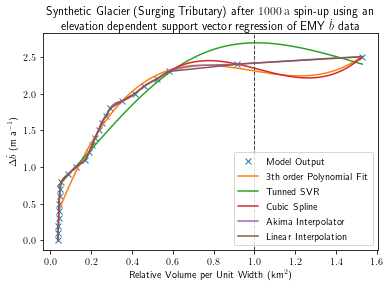

In [156]:
plt.plot(RA, del_bd, 'x',label='Model Output')

RA_dense = np.linspace(RA.min(),RA.max(),1000)

plt.axvline(1.0, ls='--',c='k',alpha=0.75,lw=1)

plt.plot(RA_dense, 
         np.polyval(np.polyfit(RA, del_bd, 3), RA_dense), 
         label='3th order Polynomial Fit')

plt.plot(RA_dense, 
         svr.predict(RA_dense.reshape(-1,1)),
         label='Tunned SVR')

plt.plot(RA_dense, 
         cs(RA_dense),
         label='Cubic Spline')

plt.plot(RA_dense, 
         ak(RA_dense), 
         label = 'Akima Interpolator')

plt.plot(RA_dense, 
         LS1(RA_dense), 
         label='Linear Interpolation')


plt.title(r'\begin{center} Synthetic Glacier (Surging Tributary) after $1000 \; \rm{a}$ spin-up using an \\ elevation dependent support vector regression of EMY $\dot b$ data \end{center}')
plt.ylabel('$\Delta \dot b$ (m a$^{-1}$)')
plt.xlabel('Relative Volume per Unit Width (km$^2$)')

plt.legend()

plt.savefig('../plots/offset_v_area_1002a.png',dpi=300,bbox_inches='tight',facecolor="w")

In [116]:
# print('Linear Fit    :  bdot = {:2.3f} @ Delta V =0'.format(np.polyval(np.polyfit(RA, del_bd, 5), 1.0)))
# print('5th order poly:  bdot = {:2.3f} @ Delta V =0'.format(np.polyval(np.polyfit(RA, del_bd, 1), 1.0)))
print('Akima Interp.  :  bdot = {:2.4f} @ Delta V =0'.format(ak(1.0)))
print('Linear Interp. :  bdot = {:2.3f} @ Delta V =0'.format(L1D(1.0)))

Akima Interp.  :  bdot = 2.4149 @ Delta V =0
Linear Interp. :  bdot = 2.4135 @ Delta V =0


In [45]:
np.count_nonzero((np.stack(MB_PRE)[0,-1,:,7] - np.stack(MB_PRE)[0,-1,:,8]) > 10.) / \
np.count_nonzero((np.stack(MB_PRE)[0,0,:,7 ] - np.stack(MB_PRE)[0,0,:,8]) > 10.)

0.1276595744680851

In [46]:
XX, MB = np.meshgrid(MB_PRE[0][0,:,4], del_bd)

/Users/andrewnolan/anaconda3/envs/oggm_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


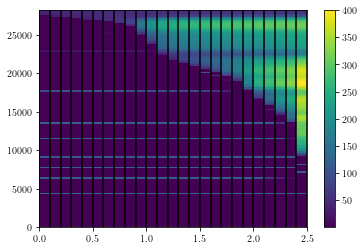

In [47]:
fig, ax = plt.subplots(1,1)

im = ax.pcolormesh(MB,XX, (np.stack(MB_PRE)[:,-1,:,7] - np.stack(MB_PRE)[:,-1,:,8]))# > 10.

for mb in del_bd:
    ax.axvline(mb,c='k')
fig.colorbar(im)

In [48]:
XX, MB = np.meshgrid(MB_PRE[0][0,:,4], del_bd)

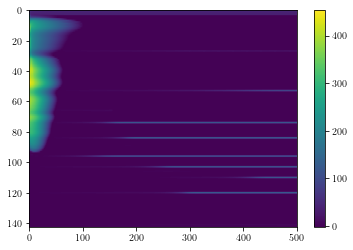

In [49]:
fig, ax = plt.subplots(1,1)

im = ax.imshow((MB_PRE[0][:,:,7] - MB_PRE[0][:,:,8]).T,aspect='auto')
fig.colorbar(im)

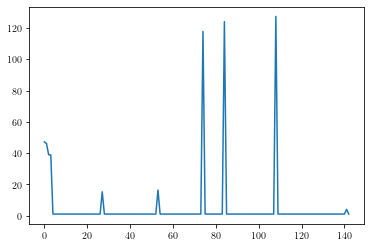

In [39]:
plt.plot((MB_PRE[0][-1,:,7] - MB_PRE[0][-1,:,8]))

In [40]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [41]:
ss = np.loadtxt('../Data/SurfTopo.dat')

In [43]:
dat = MB_PRE[0]
fig, ax = plt.subplots(1,1,figsize=(8,4))

ax.set_xlim(dat[0,:,4].min(),dat[0,:,4].max())
ax.set_ylim(dat[0,:,8].min()-25, dat[0,:,8].max()+200)
ax.set_ylabel('m a.s.l.')
ax.set_xlabel('x-coord (m)')
ax.set_title('$\Delta \dot b =$ {}'.format(del_bd[0]))

ax.plot(ss[:,0],ss[:,1])
ax.plot(dat[0,:,4],dat[0,:,8])
line1, = ax.plot([], [], lw=2, color='lightblue',label='Upwind')

line = [line1]

def animate(i):  
    line[0].set_data(dat[0,:,4], dat[i,:,7])
    return line

anim = animation.FuncAnimation(fig, animate, 
                               frames=range(0,dat.shape[0]), interval=150, blit=True)

plt.tight_layout()
plt.close()
anim

In [44]:
#anim.save('../plots/animation.mp4', fps=10,dpi=300)

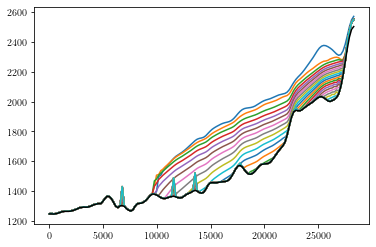

In [46]:
fig, ax = plt.subplots()

for t in range(0,dat.shape[0],5):
    ax.plot(dat[t,:,4], dat[t,:,7])
    
ax.plot(dat[t,:,4], dat[t,:,8],'k')

#fig.savefig('../plots/test.png',dpi=300)

In [47]:
(dat[:,:,7 ] - dat[:,:,8]) > 10 

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

Text(0.5, 0, 'Time (a)')

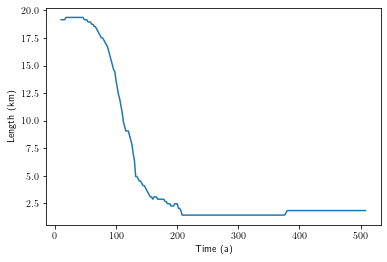

In [48]:
L = np.count_nonzero((dat[:,:,7 ] - dat[:,:,8]) > 10 ,axis=1)*206/1000.0

plt.plot((dat[:,0,0]+4)*2, L)
plt.ylabel('Length (km)')
plt.xlabel('Time (a)')

In [49]:
dat.shape

(250, 143, 12)

(-0.1, 1.2)

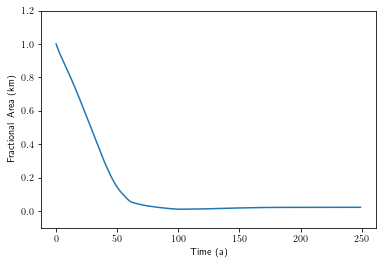

In [52]:
    
plt.plot(np.trapz((dat[:,:,7] - dat[:,:,8])/np.trapz(dat[0,:,7] - dat[0,:,8]), axis = 1))
plt.ylabel('Fractional Area (km)')
plt.xlabel('Time (a)')

plt.ylim(-0.1, 1.2)

In [ ]:
! ls ../*.h5

In [ ]:
import h5py

with h5py.File('../LK_PRE_500a_MB_2.6_OFF.h5', 'r') as f:
    ELMER_MB = f['b_dot'][:]
    x = f['x'][:]


In [ ]:
with h5py.File('../LK_ST_500a_mb_2.6_off.h5', 'r') as f:
    manual_MB = f['b_dot'][:]

In [ ]:
plt.plot(x,ELMER_MB, label='Elmer/Ice') 

plt.plot(x,manual_MB, label='Manually Calculated') 

plt.ylabel('$\dot b$ (m a$^{-1}$)')
plt.xlabel('$x$ coordinate (m)')
plt.title('Surface Mass Balance Forcing')
plt.legend()

plt.savefig('../plots/elmer_vs_manual_SMB_svr.png',dpi=300,bbox_inches='tight')

In [ ]:
import h5py

with h5py.File('myfile.h5', 'w') as f:
    dset = f.create_dataset(
        "grids", 
        (10,10,5), 
        maxshape=(10,10,None), 
        dtype='f4', 
        chunks=True,
        compression='gzip')

In [ ]:
!h5ls -r myfile.h5

In [ ]:
mygrids = [np.random.randn(10,10) for _ in range(5)]

print(np.shape(mygrids))  # 5 grids of 10 by 10



In [ ]:
with h5py.File('myfile.h5', 'a') as f:
    grids = f['grids']
    
    for k,g in enumerate(mygrids):
        grids[:,:,k] = g


In [ ]:
with h5py.File('myfile.h5', 'r') as f:
    mygrids = f['grids'][:,:,[0,2,4]]  # 3 grids out of 5
    
print(np.shape(mygrids))

In [ ]:
import h5py
import numpy as np

## Data set with shape (5, 5) and list containing column names as string
data = np.random.rand(5, 5)
col_names = ["a", "b", "c", "d", "e"]
## Create file pointer
with h5py.File("data_set_2.HDF5", "w") as fp :
    ds_dt = np.dtype( { 'names':col_names,
                        'formats':[ (float), (float), (float), (float), (float)] } )
    rec_arr = np.rec.array(data,dtype=ds_dt)        
    ## Store data
    ##fp["sub"] = data
    ds1 = fp.create_dataset('sub', data=rec_arr )

In [ ]:
rec_arr.dtype